# Import

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#!pip install matplotlib

from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold

In [3]:
data = pd.read_csv (r'C:\Users\bego_\Desktop\ML_project\src\data\Salary.csv')
# Fuente: https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country

# Feature

In [4]:
# Ordenar el DataFrame por la columna 'Salary' de menor a mayor
data = data.sort_values(by='Salary')

# Crear un diccionario para asignar valores numéricos a cada 'Job Title' basado en el salario
jobtitle_salary_mapping = {title: idx for idx, title in enumerate(data['Job Title'].unique(), start=1)}

# Mapear los títulos de trabajo al valor numérico basado en el salario
data['Job Title Numeric'] = data['Job Title'].map(jobtitle_salary_mapping)

In [5]:
# Crear un diccionario para asignar valores numéricos a cada 'Job Title' basado en el salario
jobtitle_salary_mapping = {title: idx for idx, title in enumerate(data['Job Title'].unique(), start=1)}

# Mostrar cada valor único de 'Job Title' con su valor numérico correspondiente
unique_job_titles = data['Job Title'].unique()

for title in unique_job_titles:
    job_numeric = jobtitle_salary_mapping[title]
    print(f"{title}: {job_numeric}")

Business Operations Analyst: 1
HR Coordinator: 2
Front end Developer: 3
Software Engineer Manager: 4
Sales Associate: 5
Receptionist: 6
Sales Representative: 7
Delivery Driver: 8
Digital Marketing Manager: 9
Customer Service Representative: 10
HR Generalist: 11
Juniour HR Coordinator: 12
Sales Executive: 13
Software Developer: 14
Web Developer: 15
Accountant: 16
Marketing Analyst: 17
Sales Manager: 18
Help Desk Analyst: 19
Business Development Associate: 20
Operations Analyst: 21
Data Entry Clerk: 22
Customer Support Specialist: 23
Operations Manager: 24
Software Engineer: 25
Business Analyst: 26
Developer: 27
Marketing Coordinator: 28
Customer Success Rep: 29
Marketing Specialist: 30
Copywriter: 31
Project Manager: 32
Financial Analyst: 33
Technical Support Specialist: 34
Operations Coordinator: 35
Designer: 36
Customer Service Rep: 37
Customer Success Manager: 38
Product Manager: 39
Juniour HR Generalist: 40
Graphic Designer: 41
Account Manager: 42
Data Scientist: 43
Event Coordinato

In [6]:
# Ordenar el DataFrame por la columna 'Salary' de menor a mayor manteniendo el orden de 'Country'
data = data.sort_values(by='Salary')

# Crear un diccionario para asignar valores numéricos a cada 'Country' basado en el salario
country_salary_mapping = {country: idx for idx, country in enumerate(data['Country'].unique(), start=1)}

# Mapear los países al valor numérico basado en el salario
data['Country Numeric'] = data['Country'].map(country_salary_mapping)

In [7]:
# Convertir valores string de la columna 'Race' a valores numéricos
race_numeric, _ = data['Race'].factorize()

# Añadir la nueva columna 'Race Numeric' (números empezando desde 1)
data['Race Numeric'] = race_numeric + 1  # Sumar 1 para iniciar los números desde 1

# Actualizar el DataFrame original 'data' con la nueva columna 'Race Numeric'
data['Race Numeric'] = data['Race Numeric']

In [8]:
# Mapear las string "Gender" a valores numéricos
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [9]:
data_numeric = data[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]

# Dividir en train_1 y test_1, el modelo se aplica a train_1

In [10]:
# Dividir en train1 y test1 para trabajar solo con el conjunto de entrenamiento train1, y mantener el conjunto de prueba test1
    # sin cambios hasta el final del proceso de aprendizaje automático

X = data_numeric[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]
y = data_numeric["Salary"] # target 

# Dividir TODOS los datos en train y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Train2 features shape:", X_train1.shape)
print("Test2 features shape:", X_test1.shape)
print("Train2 target shape:", y_train1.shape)
print("Test2 target shape:", y_test1.shape)

Train2 features shape: (5347, 8)
Test2 features shape: (1337, 8)
Train2 target shape: (5347,)
Test2 target shape: (1337,)


# XGBR

In [11]:
X = data_numeric[['Age', 'Gender', 'Education Level', 'Years of Experience', 'Senior', 'Job Title Numeric', 'Country Numeric', 'Race Numeric']]
y = data_numeric["Salary"] # target 

In [12]:
# Dividir train1 en train2 y test2:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [13]:
# Inicializar y entrenar el modelo XGBoost (XGBRegressor)
xgb = XGBRegressor()
xgb.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
# Realizar predicciones en el conjunto de prueba
predictions_xgb = xgb.predict(X_test2)

In [15]:
# Rendimiento del modelo
mse_xgb = mean_squared_error(y_test2, predictions_xgb)
r2_xgb = r2_score(y_test2, predictions_xgb)
mae_xgb = mean_absolute_error(y_test2, predictions_xgb)
pearson_corr_xgb, _ = pearsonr(y_test2, predictions_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")
print(f"Pearson Correlation (XGBoost): {pearson_corr_xgb}")

Mean Squared Error (XGBoost): 72051784.08576588
R-squared (XGBoost): 0.9742944896959034
Mean Absolute Error (XGBoost): 4828.656434360397
Pearson Correlation (XGBoost): 0.9870840991570619


In [16]:
# Realizar predicciones en el conjunto de prueba 1
predictions_xgb = xgb.predict(X_test1)

In [17]:
# Rendimiento del modelo en test1
mse_xgb = mean_squared_error(y_test1, predictions_xgb)
r2_xgb = r2_score(y_test1, predictions_xgb)
mae_xgb = mean_absolute_error(y_test1, predictions_xgb)
pearson_corr_xgb, _ = pearsonr(y_test1, predictions_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")
print(f"Pearson Correlation (XGBoost): {pearson_corr_xgb}")

Mean Squared Error (XGBoost): 86761783.70868415
R-squared (XGBoost): 0.9691117627553942
Mean Absolute Error (XGBoost): 4981.462563399869
Pearson Correlation (XGBoost): 0.9844477019319562


Gráfico de Comparación de Salarios Reales vs. Predichos

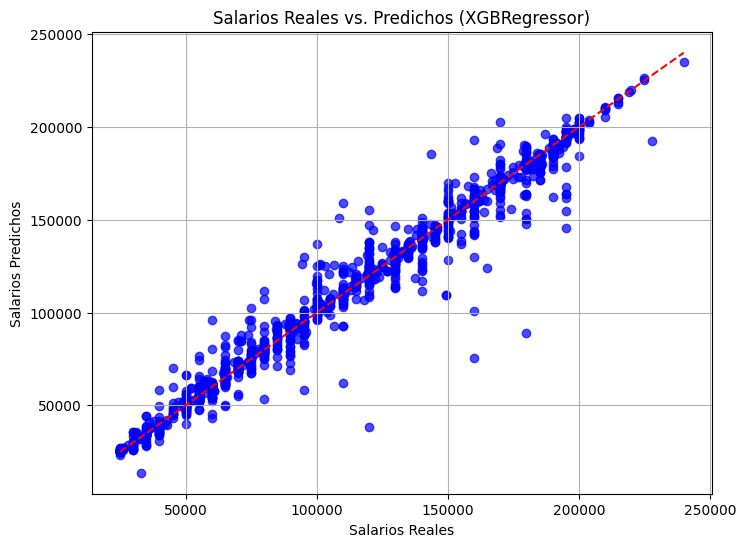

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test1, predictions_xgb, color='blue', alpha=0.7)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='red', linestyle='--')  
plt.title('Salarios Reales vs. Predichos (XGBRegressor)')
plt.xlabel('Salarios Reales')
plt.ylabel('Salarios Predichos')

plt.grid(True)
plt.show()


La gráfica representa la comparación entre los salarios reales y las predicciones realizadas por el modelo.

Los puntos azules dispersos representan los salarios reales y sus correspondientes predicciones por parte del modelo. Cada punto en el gráfico muestra un par de valores: el salario real en el eje x y la predicción del modelo en el eje y.

La línea roja discontinua representa la situación ideal en la que las predicciones del modelo coincidirían exactamente con los valores reales. Esta línea va desde el valor mínimo al máximo de los salarios reales y sirve como una referencia visual para mostrar cómo se alinearían los puntos si las predicciones fueran perfectas.